In [15]:
filename = "../data/Davidson_data/Figure4-KD-brain-glucose-M2.imzML" #path to datafile
#filename = "../data/2021018ISA_data_from_Steve/101.txt" #path to datafile
#outfile = "../data/2021018ISA_data_from_Steve/101_results_iso_images.txt"
m0Formula = "C16H31O2" #formula for M0 ion (with appropriate adduct)
polarity = "negative" #ionization polarity 
ppmThresh = 50 #m/z tolerance, all peaks within ppmThresh ppm will be summed into one feature
convSquare = 3 #size of filter (1=1x1,3=3x3,5=5x5)
colormap = "gray" #coloring for images, see https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
num_cores = 20 #number of processor cores to use
dm_method = "PCA" #method for dimensionality reduction ("PCA" or "TSNE") PCA has worked better for me
seg_method = "K_means" #thresholding method ("TIC_auto", "K_means", "TIC_manual")
num_components = 2 #number of compoents to use with PCA or TSNE
filt = "GB" #filtering method (GB = gaussian blur, MA = moving average)

In [16]:
#load libraries
import SIMSIToolBox
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
import zipfile
import os

In [17]:
#calculate relevant m/z's
m0Mz,mzsOI,numCarbons = SIMSIToolBox.getMzsOfIsotopologues(m0Formula,elementOfInterest="C")

In [18]:
#read data
msi = SIMSIToolBox.MSIData(mzsOI,ppm=ppmThresh,numCores = num_cores)
if ".imzML" in filename:
    msi.readimzML(filename)
else:
    msi.readHDIOutput(filename,polarity)

Text(0.5, 1.0, 'TIC')

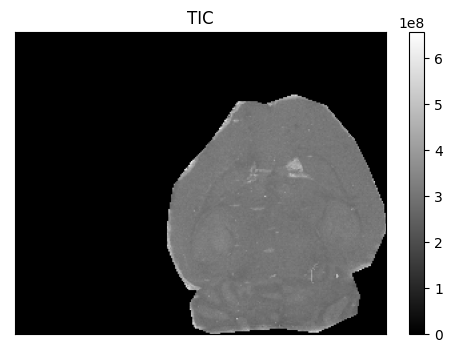

In [19]:
#show TIC image
SIMSIToolBox.showImage(msi.tic_image,cmap=colormap)
plt.title("TIC")

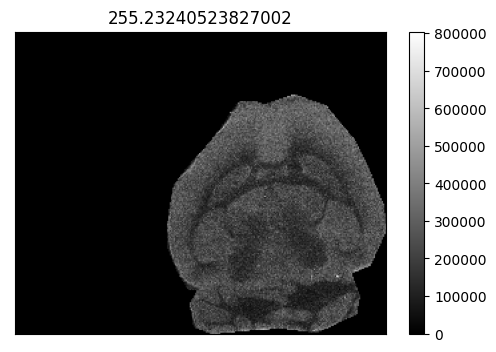

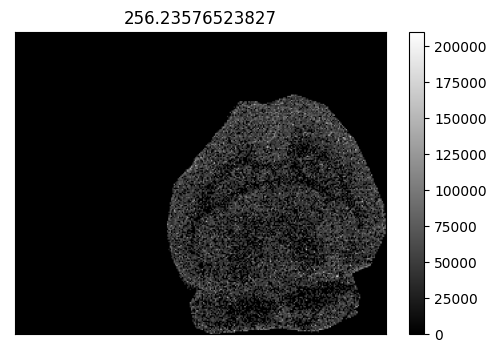

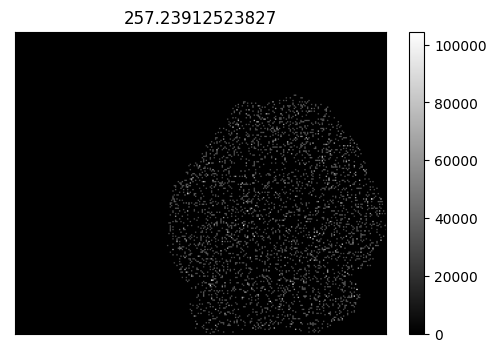

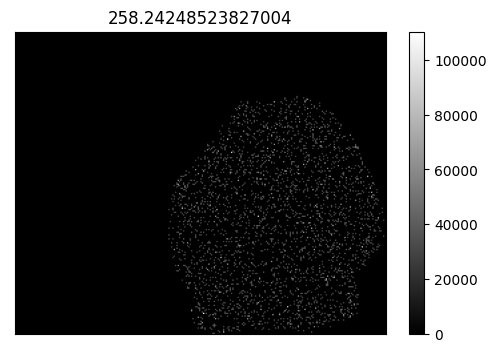

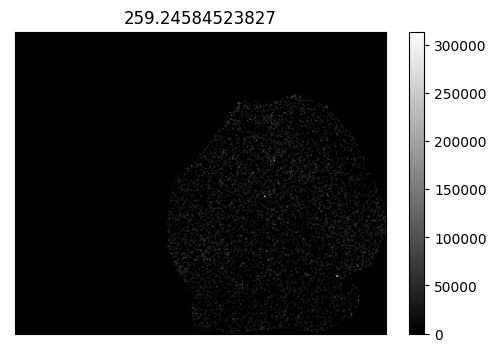

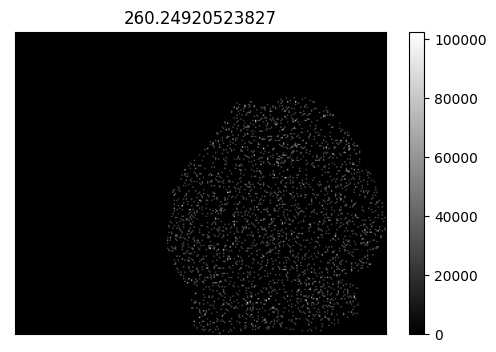

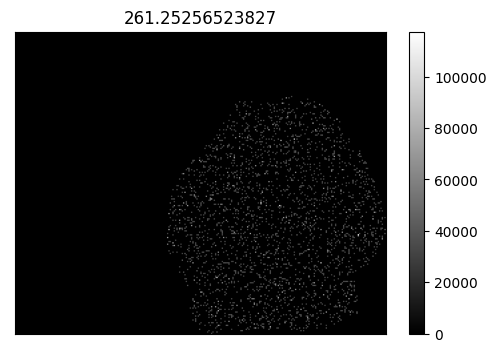

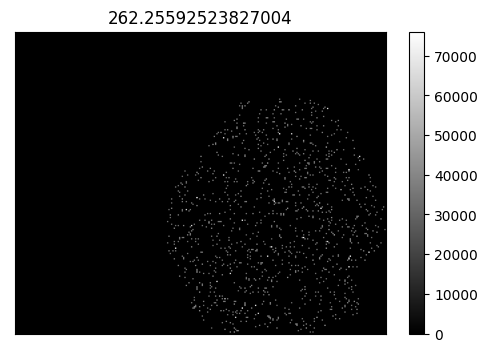

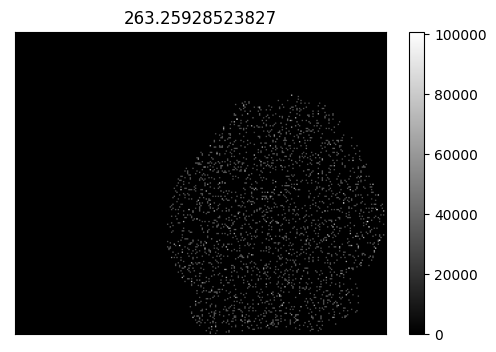

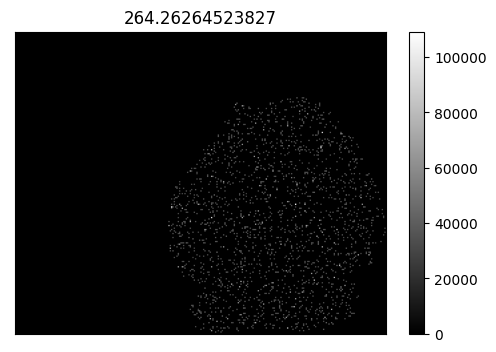

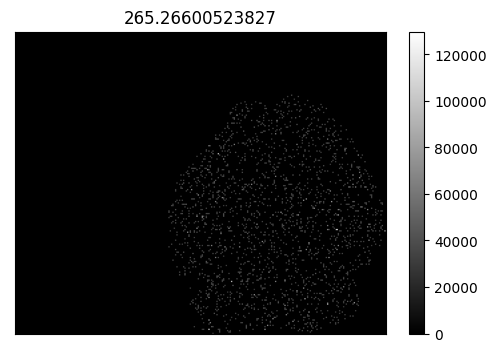

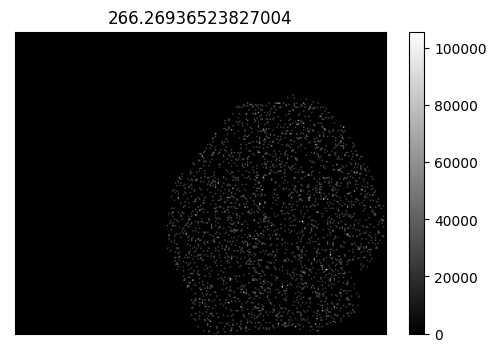

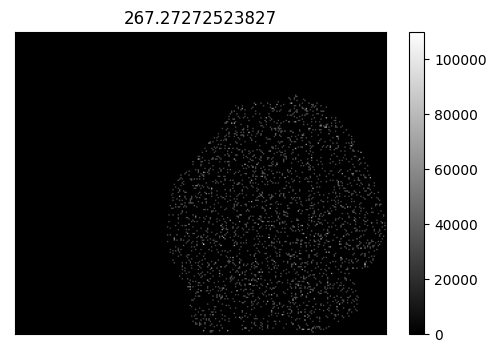

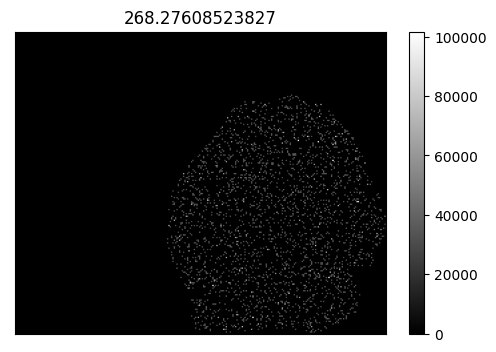

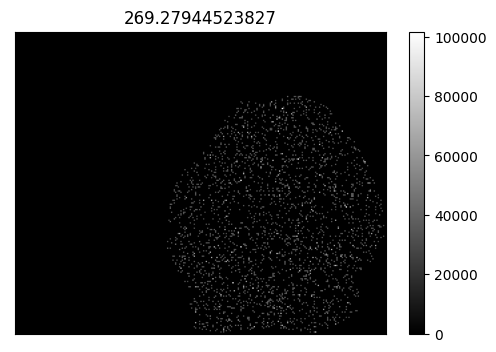

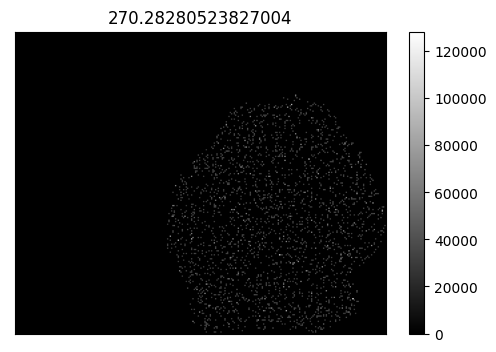

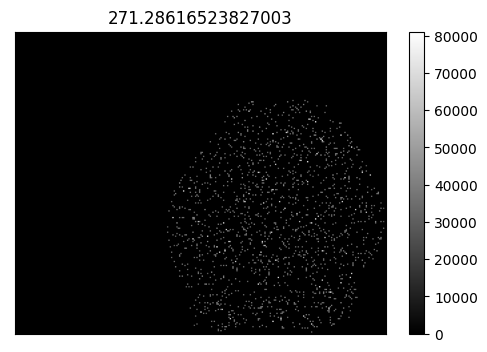

In [20]:
#show images of mzs of interest
for mz,image in zip(msi.targets,msi.data_tensor):
    plt.figure()
    SIMSIToolBox.showImage(image,cmap=colormap)
    plt.title(mz)

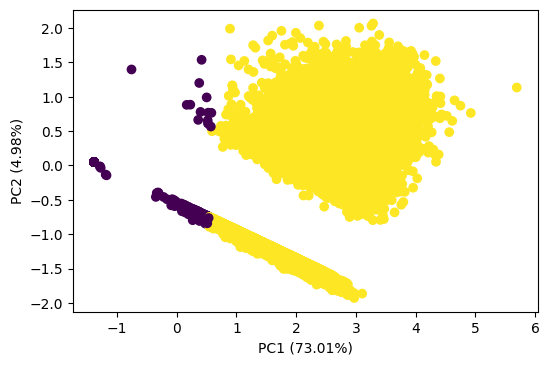

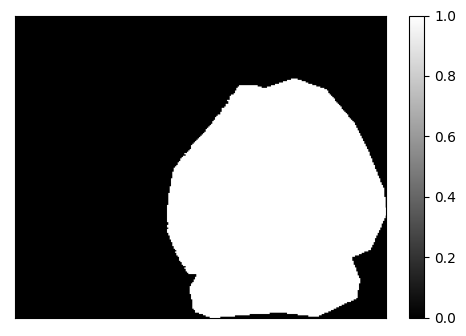

In [21]:
#segment image to remove background
msi.segmentImage(method=seg_method)
plt.figure()
SIMSIToolBox.showImage(msi.imageBoundary,cmap=colormap)

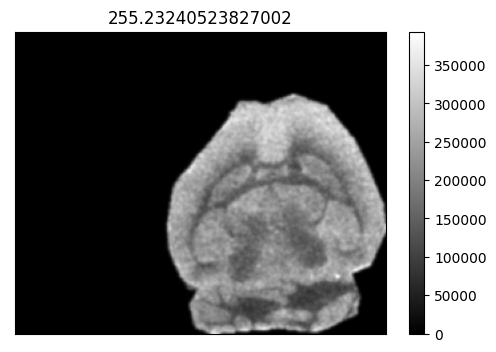

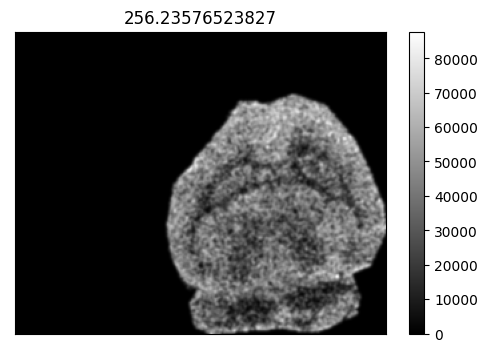

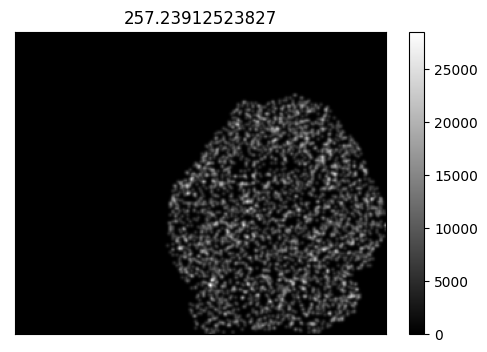

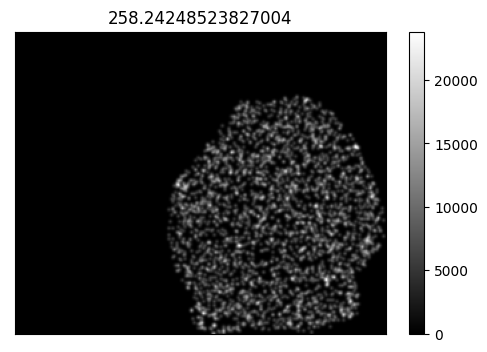

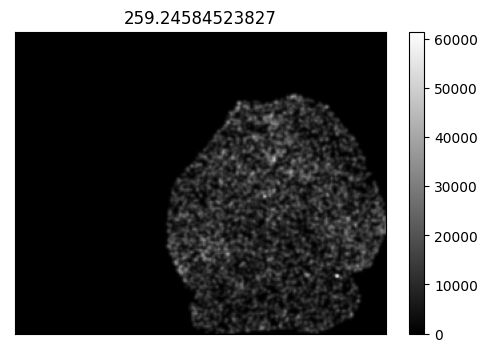

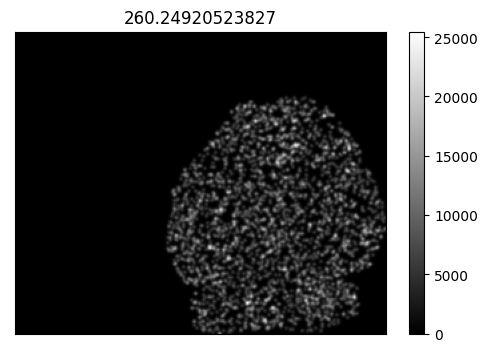

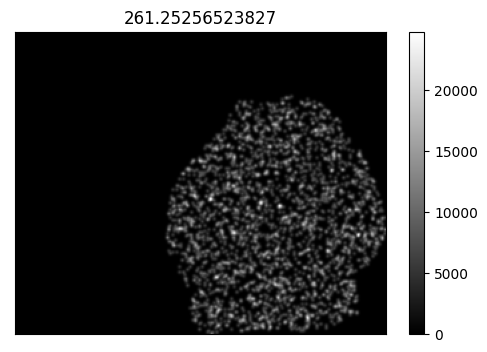

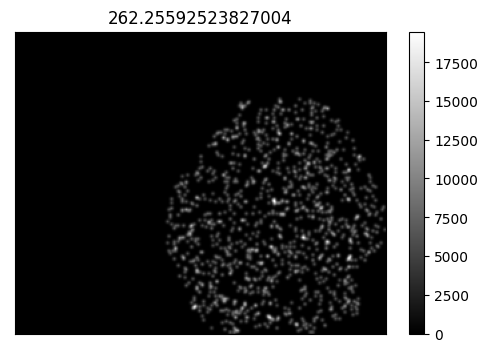

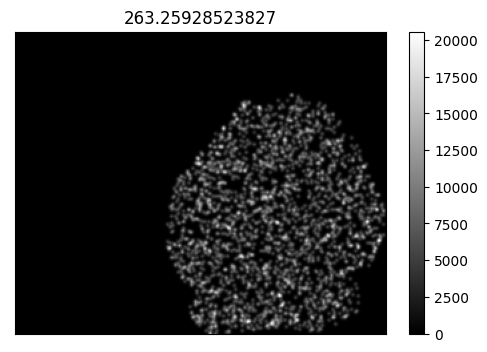

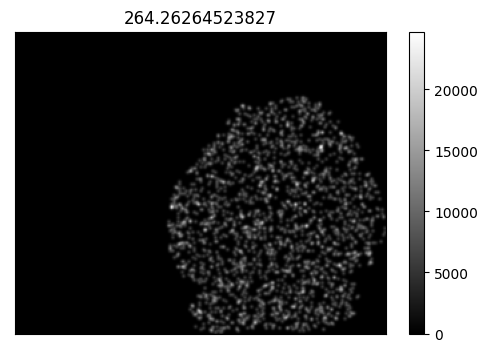

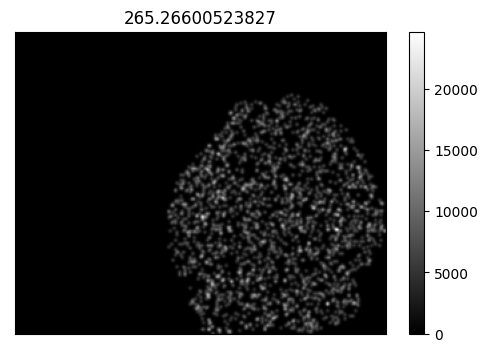

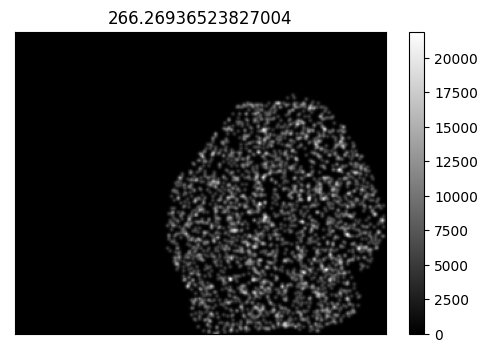

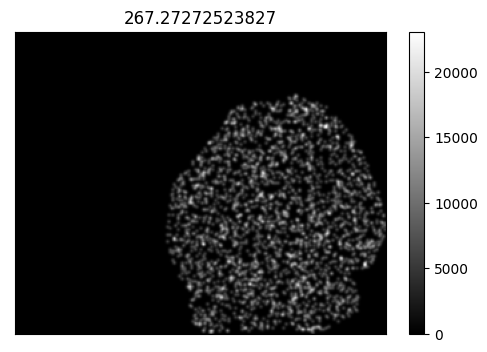

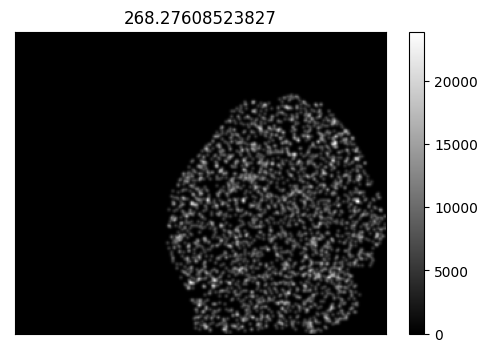

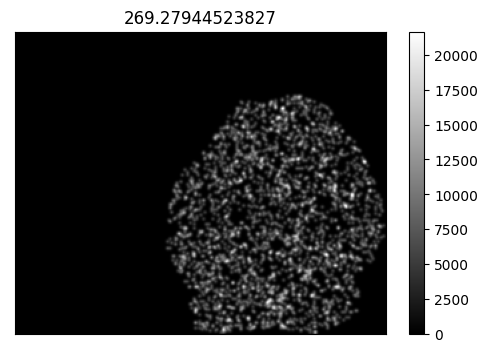

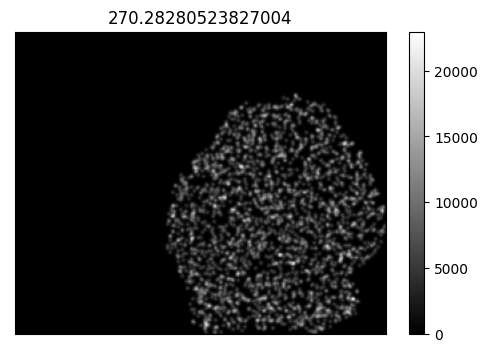

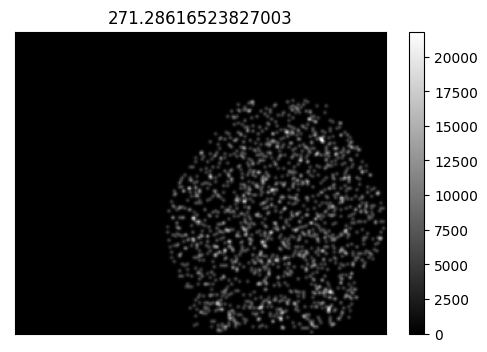

In [22]:
#smooth data and show smoothed result
if __name__ == "__main__":
    msi.smoothData(filt,convSquare)
    for mz,image in zip(msi.targets,msi.data_tensor):
        plt.figure()
        SIMSIToolBox.showImage(image,cmap=colormap)
        plt.title(mz)

In [ ]:
msi.correctNaturalAbundance(m0Formula,tracerPurity = [0.01,.99])

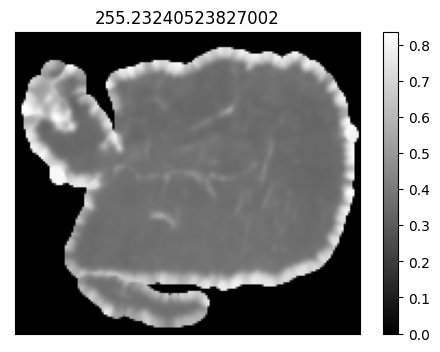

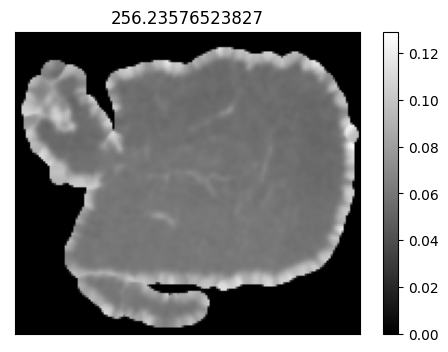

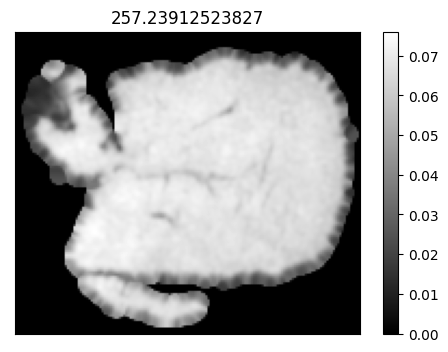

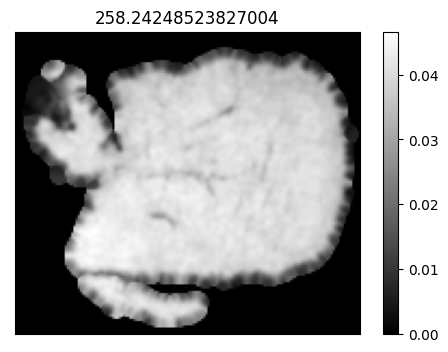

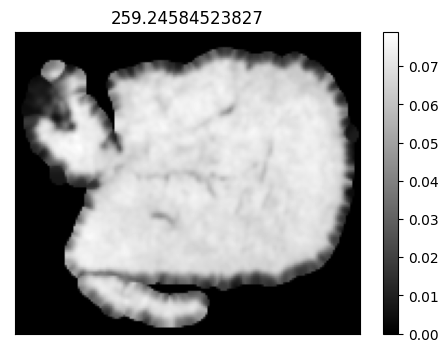

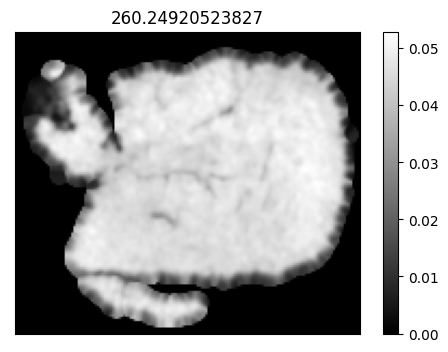

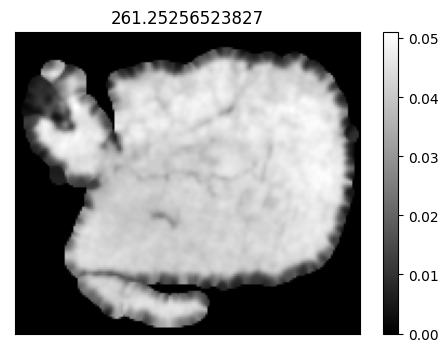

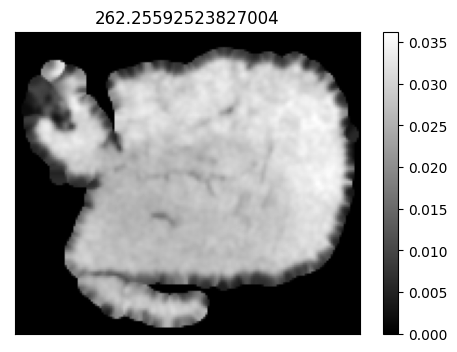

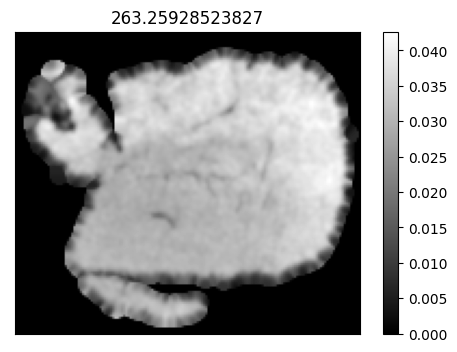

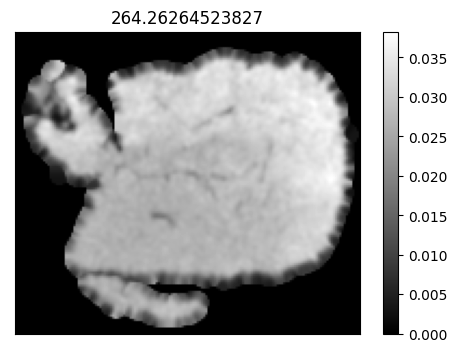

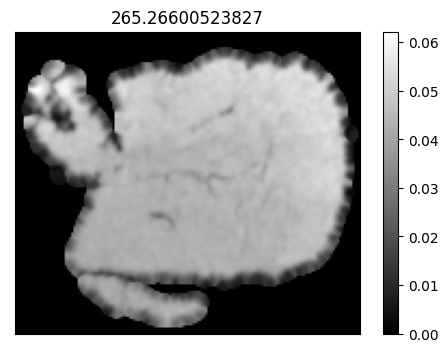

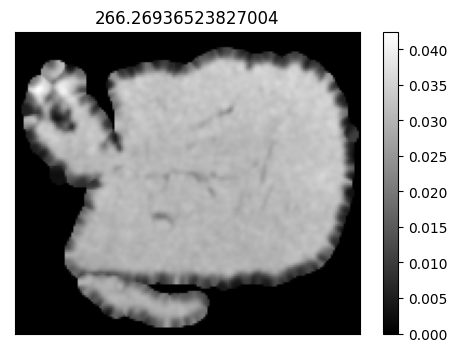

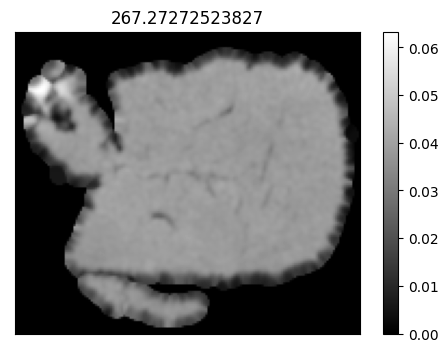

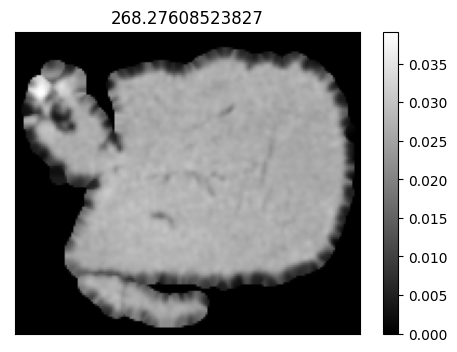

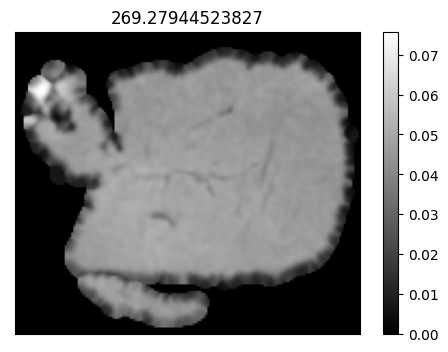

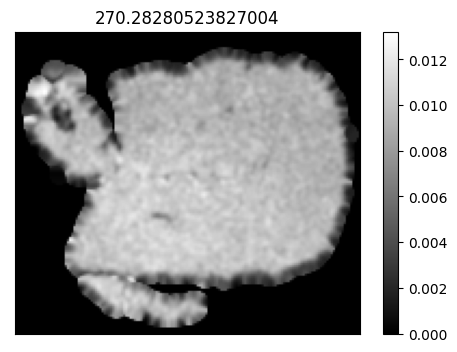

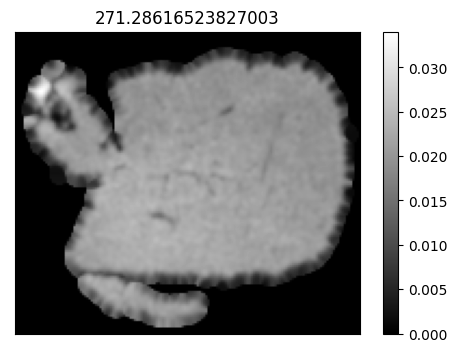

In [14]:
myzip = zipfile.ZipFile(outfile,"w")

#calculation labeling pattern images and save result
iso_tensor = SIMSIToolBox.normalizeTensor(msi.data_tensor)
counter = 0
for mz,image in zip(msi.targets,iso_tensor):
    plt.figure()
    SIMSIToolBox.showImage(image,cmap=colormap)
    plt.title(mz)
    SIMSIToolBox.saveTIF(image,"M" + str(counter) + ".tif")
    SIMSIToolBox.write_file_to_zip(myzip,"M" + str(counter) + ".tif")
    os.remove("M" + str(counter) + ".tif")
    counter += 1

myzip.close()